IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

,Risiko Ancaman Keamanan,Occurence,Severity,Detection,RPN,RSV
0,Kebakaran,1.0,5.0,1.0,5.0,5.0
1,Kebocoran,2.0,1.0,1.0,2.0,2.0
2,Aksi Kriminal Pencurian,1.0,3.0,1.0,3.0,3.0
3,Aksi Pengerusakan,1.0,3.0,1.0,3.0,3.0
4,Kehilangan peralatan,1.0,3.0,1.0,3.0,3.0
5,Kerusakan peralatan,2.0,2.0,2.0,8.0,4.0
6,Kehilangan spare part armada,2.0,3.0,1.0,6.0,6.0
7,Kerusakan armada,3.0,3.0,1.0,9.0,9.0
8,Karyawan bekerja tidak sesuai SOP,4.0,3.0,1.0,12.0,12.0
9,Karyawan menyalahgunakan wewenangnya,4.0,3.0,1.0,12.0,12.0


DATA PREPARATION

In [15]:
# Load the dataset
url = "https://raw.githubusercontent.com/marcanthonny/resmod/refs/heads/main/DATASET.csv"
df = pd.read_csv(url)

# Drop rows with NaN values
df = df.dropna()

# Encode the target variable
le = LabelEncoder()
df['Risiko Ancaman Keamanan'] = le.fit_transform(df['Risiko Ancaman Keamanan'])

# Display the first few rows of the dataframe
df.head()

C:\Users\hi\AppData\Local\Temp\ipykernel_17760\1958788080.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Risiko Ancaman Keamanan'] = le.fit_transform(df['Risiko Ancaman Keamanan'])


DESCRIPTIVE ANALYTICS

In [16]:
# Display summary statistics
print(df.describe())

# Display the data
print(df)

,Risiko Ancaman Keamanan,Occurence,Severity,Detection,RPN,RSV
0,9,1.0,5.0,1.0,5.0,5.0
1,10,2.0,1.0,1.0,2.0,2.0
2,1,1.0,3.0,1.0,3.0,3.0
3,2,1.0,3.0,1.0,3.0,3.0
4,14,1.0,3.0,1.0,3.0,3.0
5,19,2.0,2.0,2.0,8.0,4.0
6,15,2.0,3.0,1.0,6.0,6.0
7,16,3.0,3.0,1.0,9.0,9.0
8,7,4.0,3.0,1.0,12.0,12.0
9,8,4.0,3.0,1.0,12.0,12.0


CORRELATION ANALYSIS

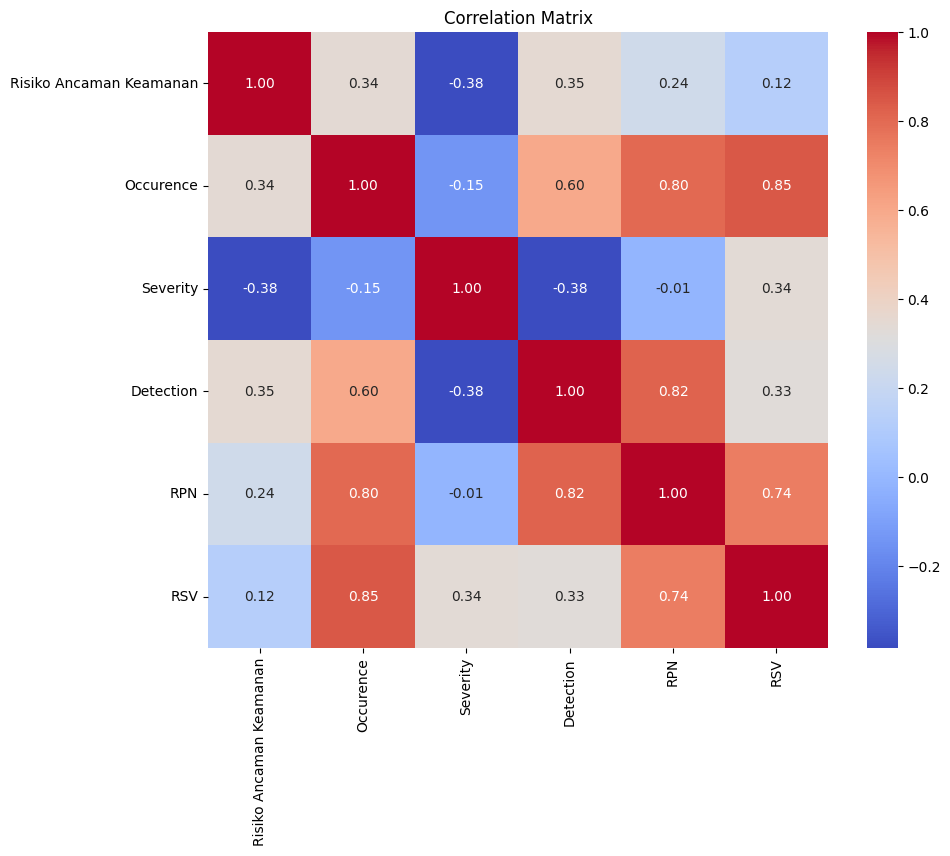

In [17]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

CLUSTERING

C:\Users\hi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hi\AppData\Local\Temp\ipykernel_17760\2230856092.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_
C:\Users\hi\AppData\Local\Temp\ipykernel_17760\2230856092.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

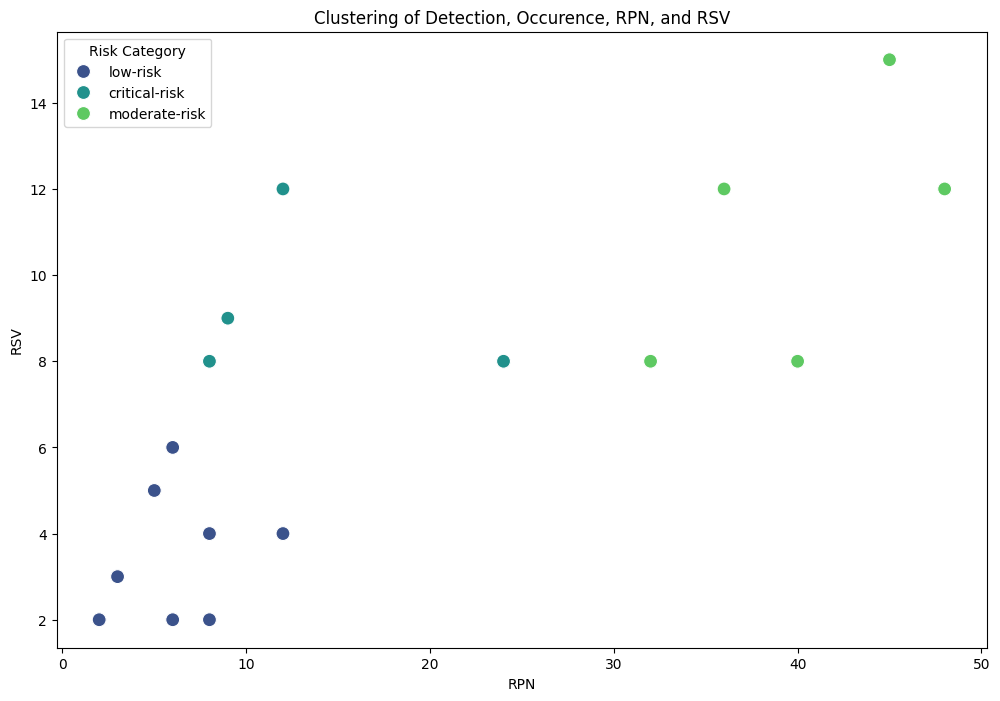

In [18]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['Risiko Ancaman Keamanan']))

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

# Map cluster labels to risk categories
risk_mapping = {0: 'low-risk', 1: 'moderate-risk', 2: 'critical-risk'}
df['Risk Category'] = df['Cluster'].map(risk_mapping)

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='RPN', y='RSV', hue='Risk Category', palette='viridis', s=100)
plt.title('Clustering of Detection, Occurence, RPN, and RSV')
plt.xlabel('RPN')
plt.ylabel('RSV')
plt.legend(title='Risk Category')
plt.show()

PREDICTIVE MODELING

Accuracy: 0.2

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

   micro avg       0.50      0.20      0.29        10
   macro avg       0.06      0.11      0.07        10
weighted avg       0.10      0.20      0.13        10



C:\Users\hi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:2561: UserWarning: labels size, 9, does not match size of target_names, 27
  warnings.warn(
C:\Users\hi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to

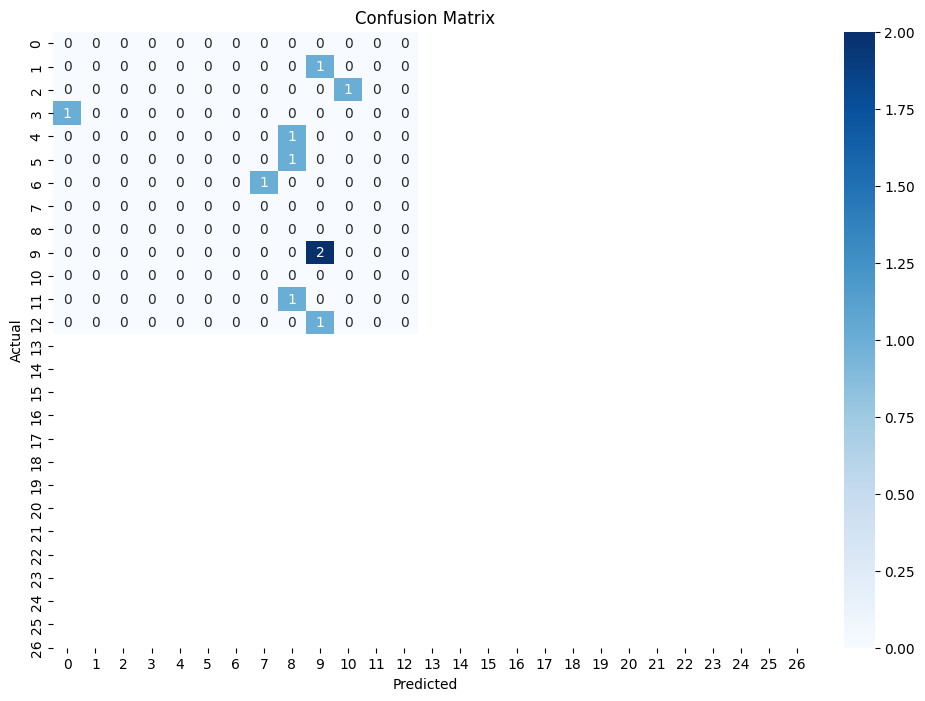

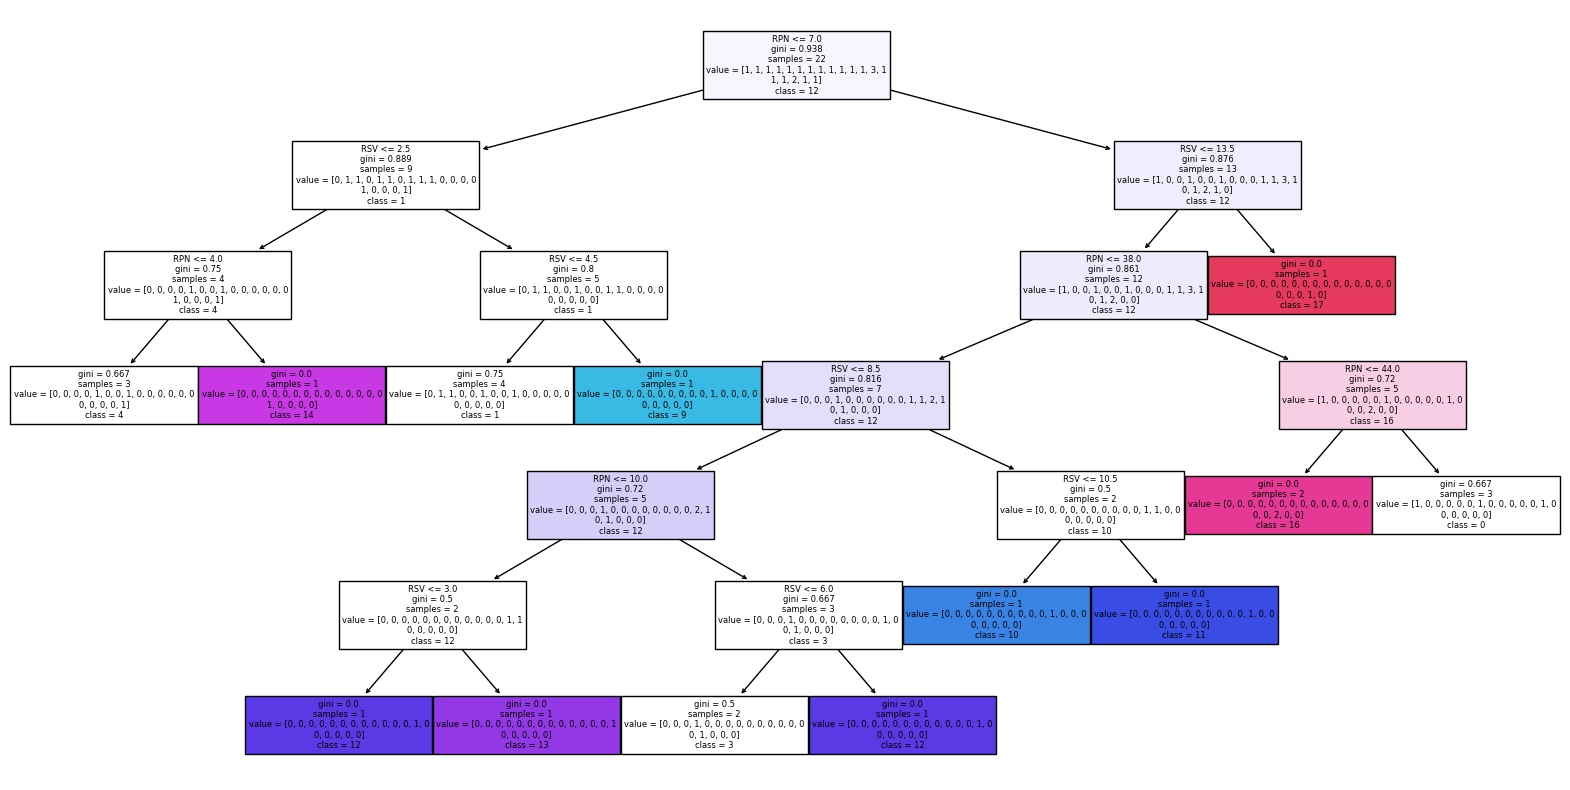

In [40]:
# Split the data into training and testing sets
X = df.drop(columns=['Risiko Ancaman Keamanan', 'Cluster', 'Risk Category'])
y = df['Risiko Ancaman Keamanan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = clf_tree.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

# Plot the confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

RANDOM FOREST

In [ ]:
# Train a Random Forest classifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = clf_rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()